In [1]:
import numpy as np
import uproot
import matplotlib.pyplot as plt
from scipy import integrate
import AnaUtils as au
import Triggered as tr
import glob
import os

In [2]:
pmt = "KA0218"
wdir = '/data/share/'+pmt
fWaves = [os.path.splitext(iF)[0] for iF in glob.glob('{}/Lin/*.bin'.format(wdir))]
fWaves

['/data/share/KA0218/Lin/N2PE_200707_100_samples_30000_events',
 '/data/share/KA0218/Lin/2PE_200707_100_samples_30000_events',
 '/data/share/KA0218/Lin/N1PE_200707_100_samples_30000_events',
 '/data/share/KA0218/Lin/N3PE_200707_100_samples_30000_events',
 '/data/share/KA0218/Lin/NPE_200707_100_samples_30000_events']

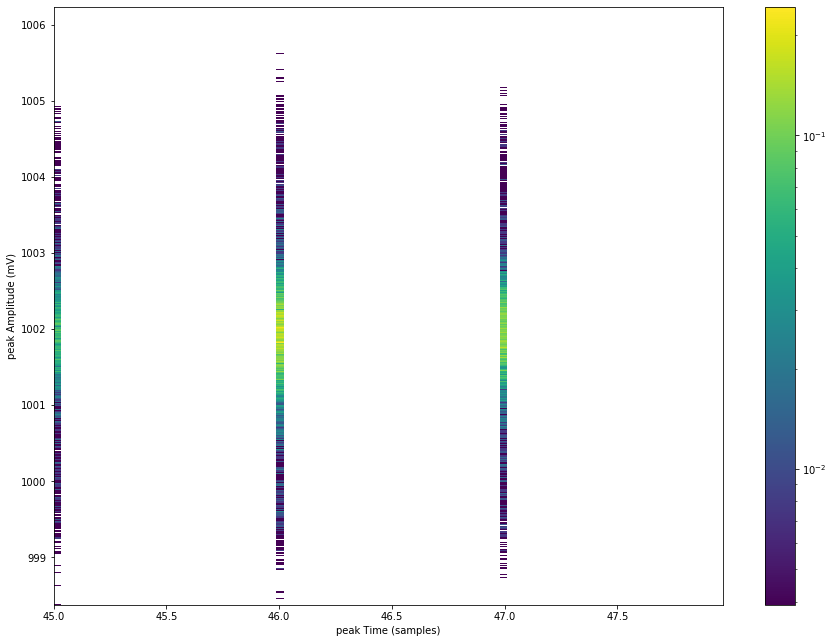

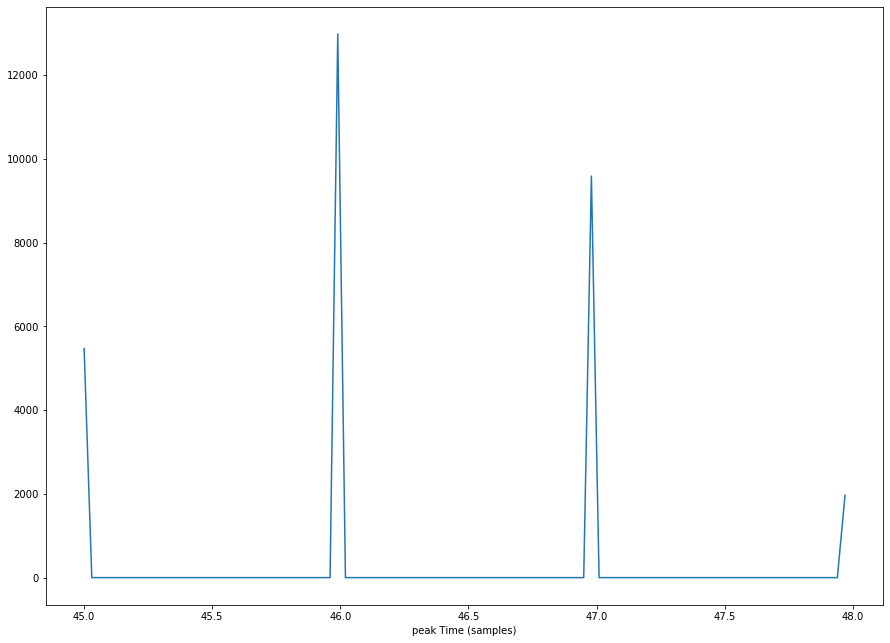

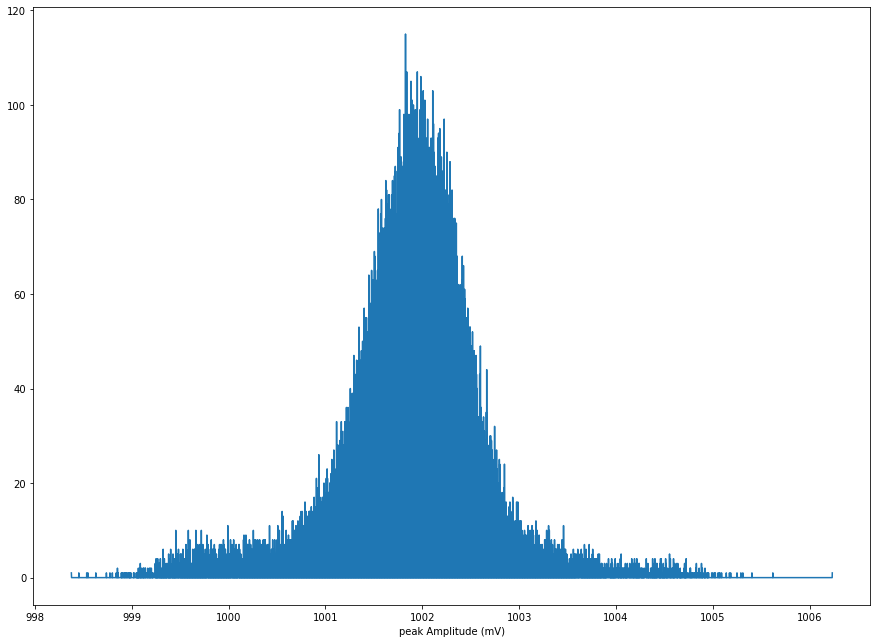

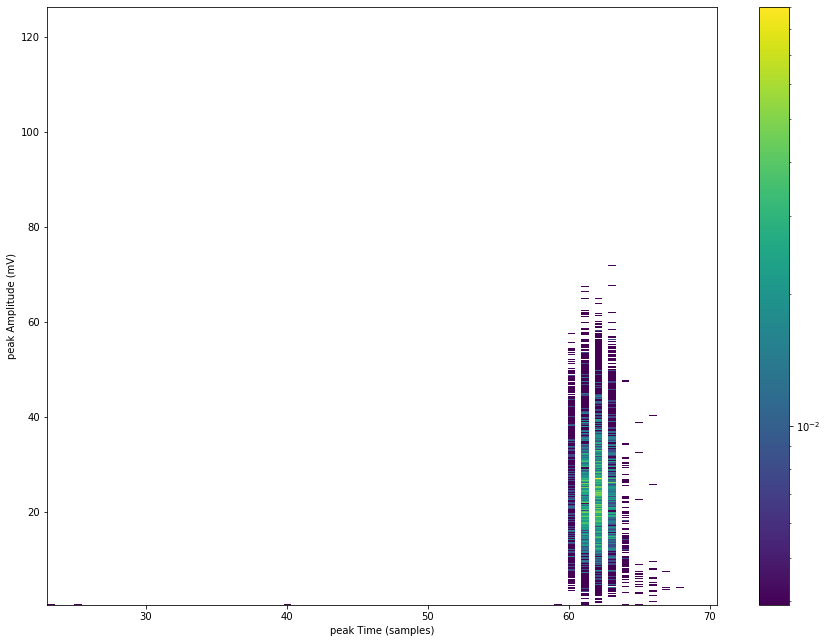

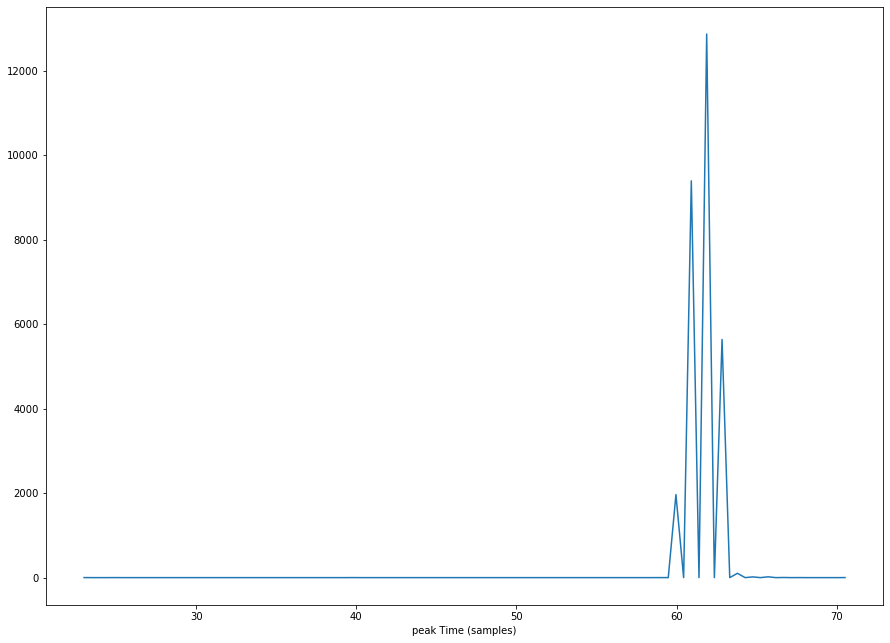

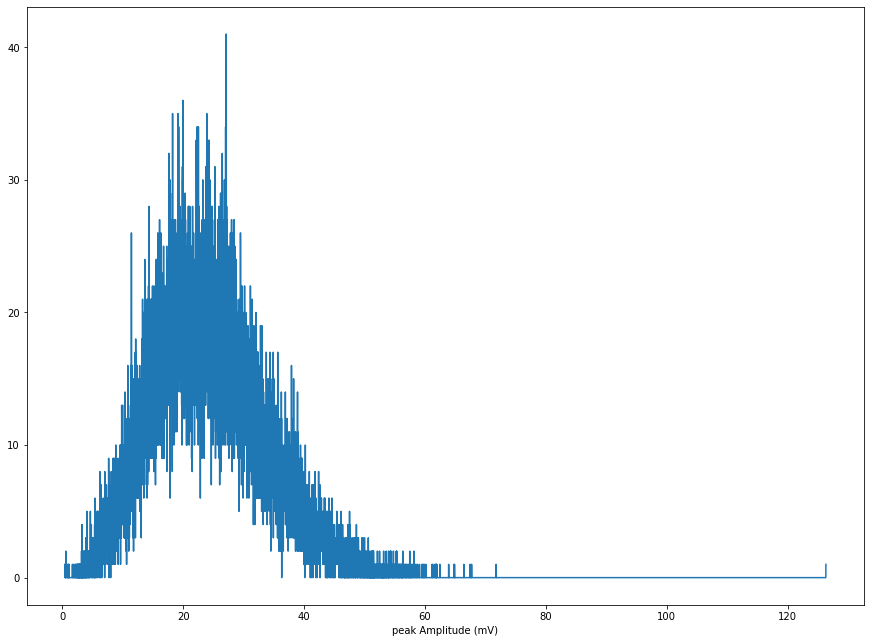

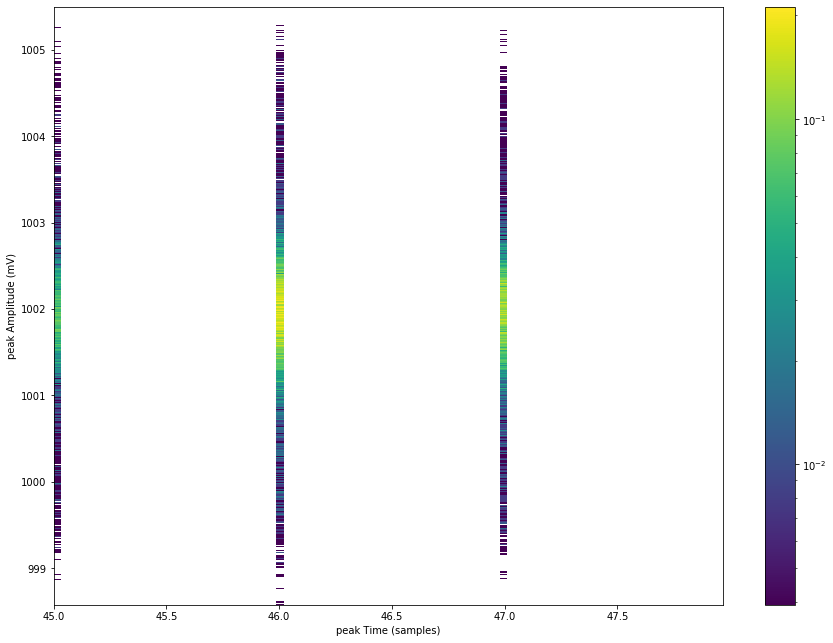

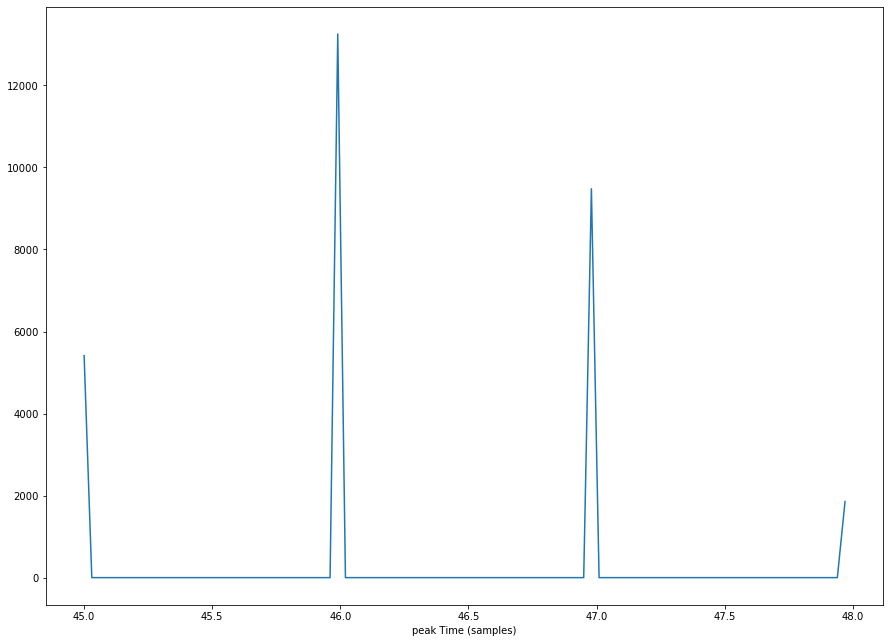

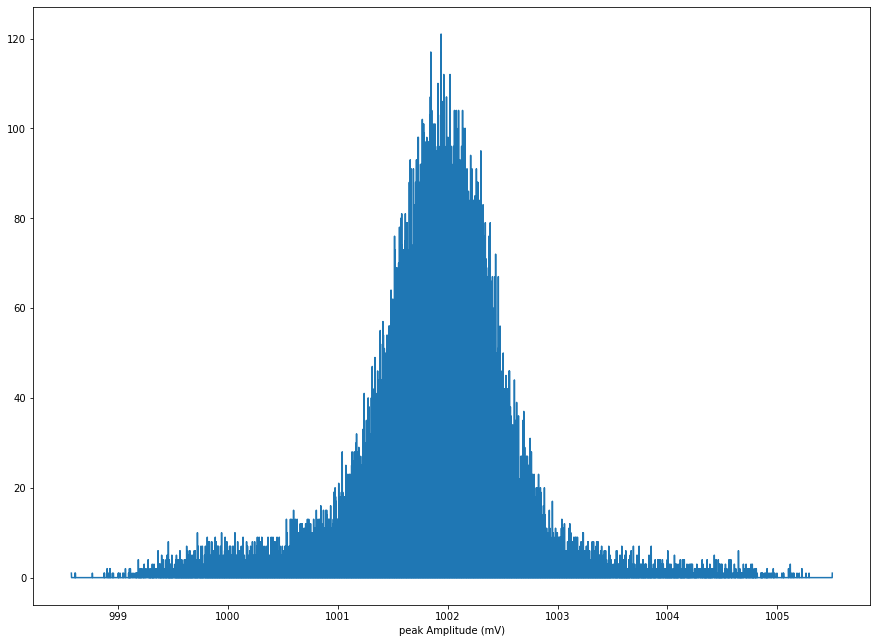

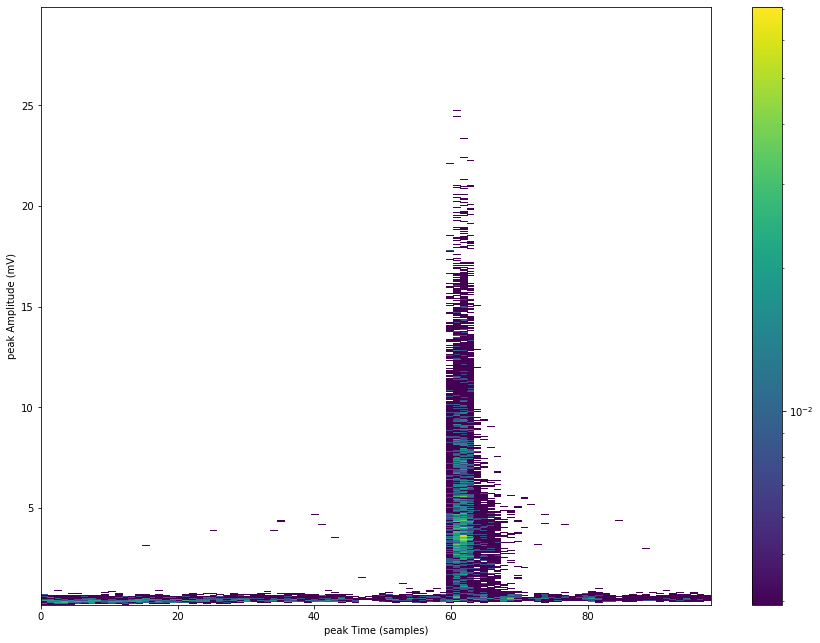

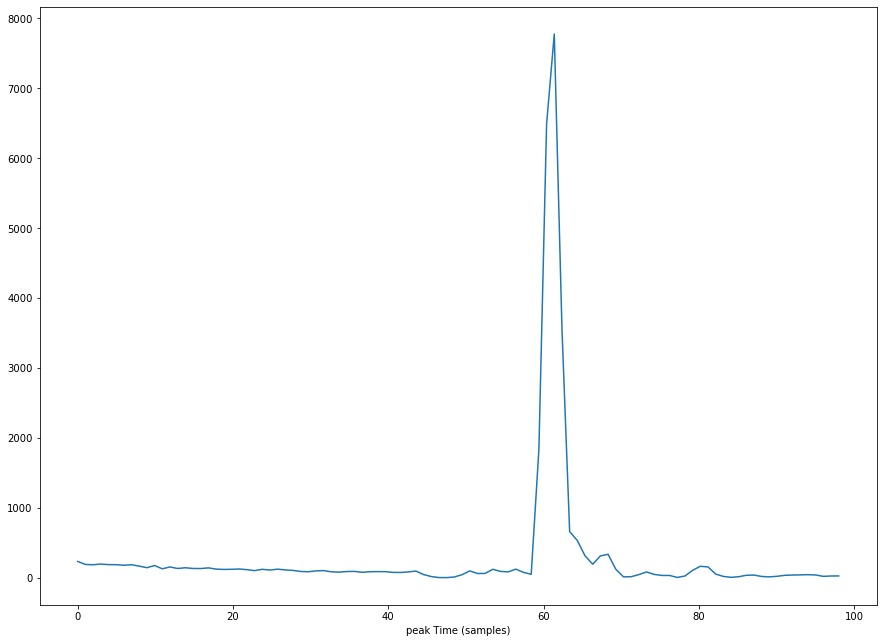

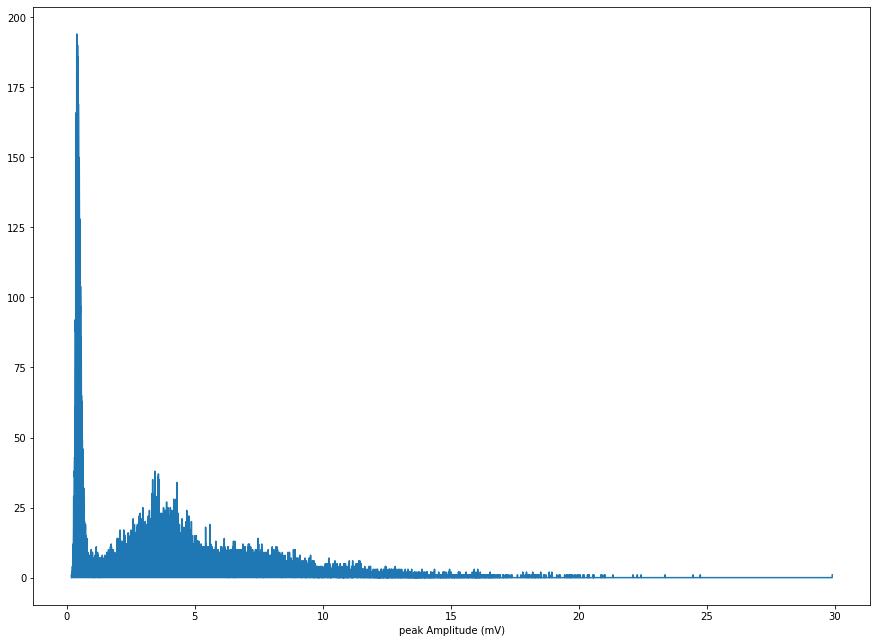

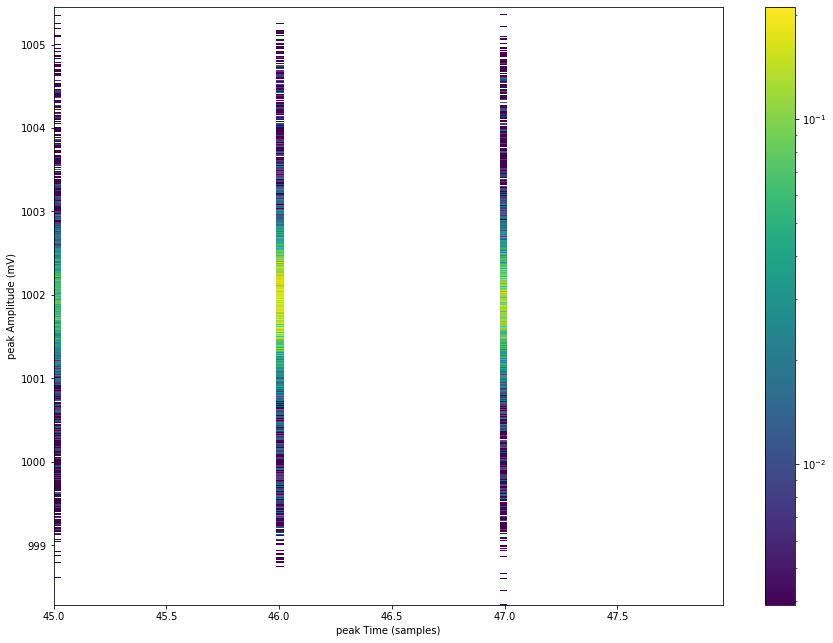

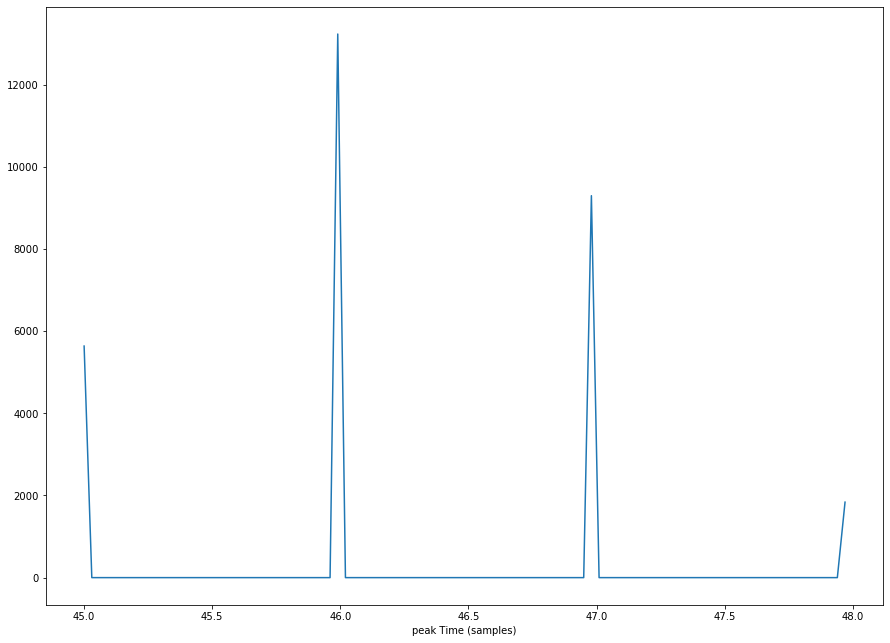

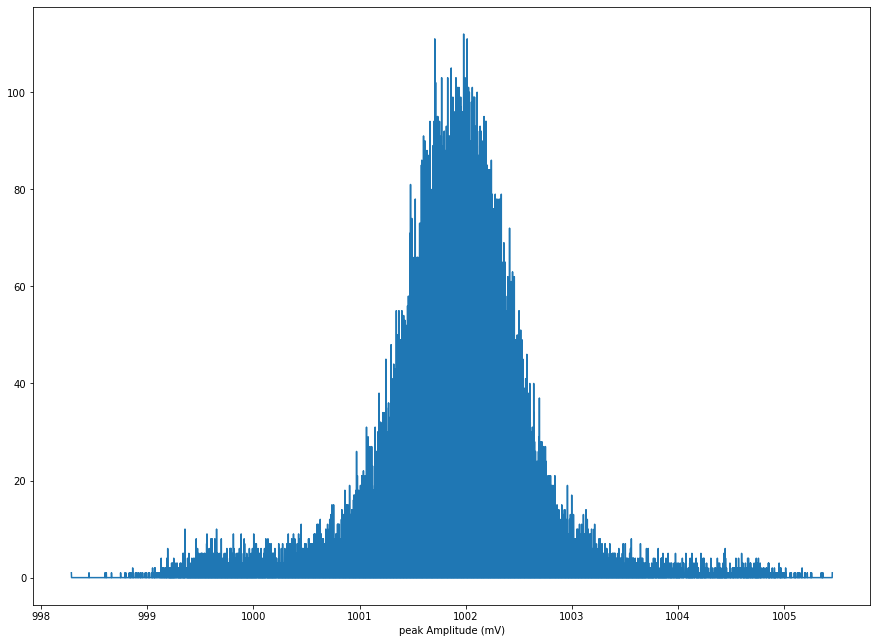

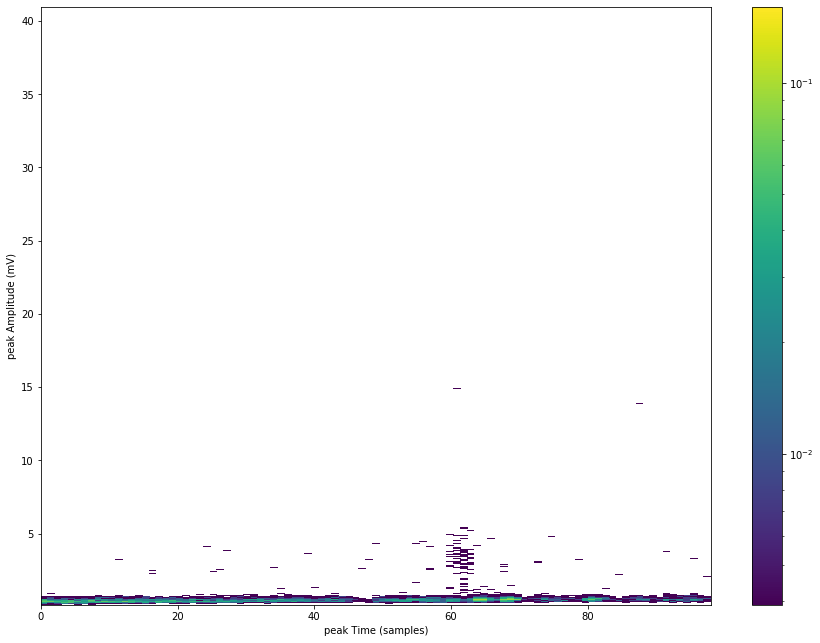

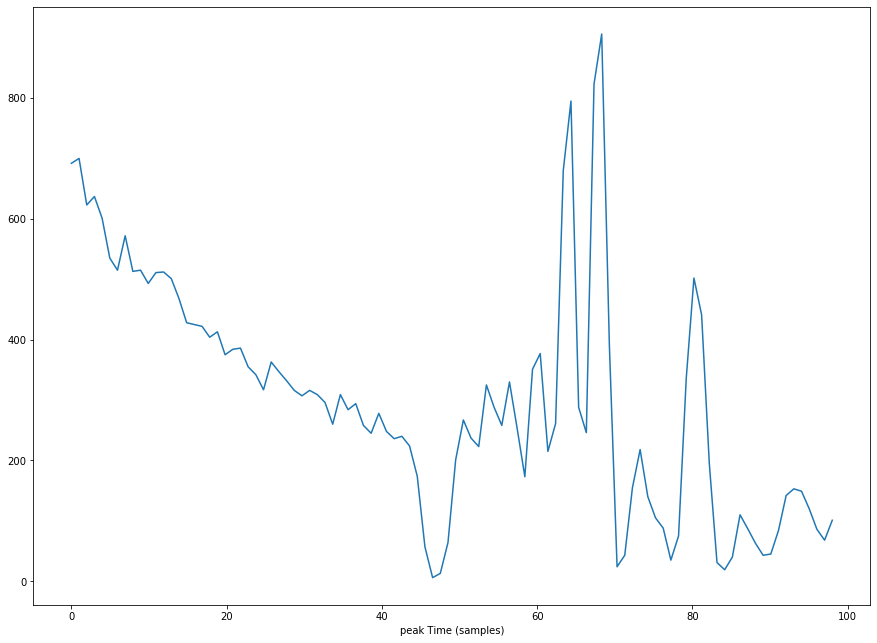

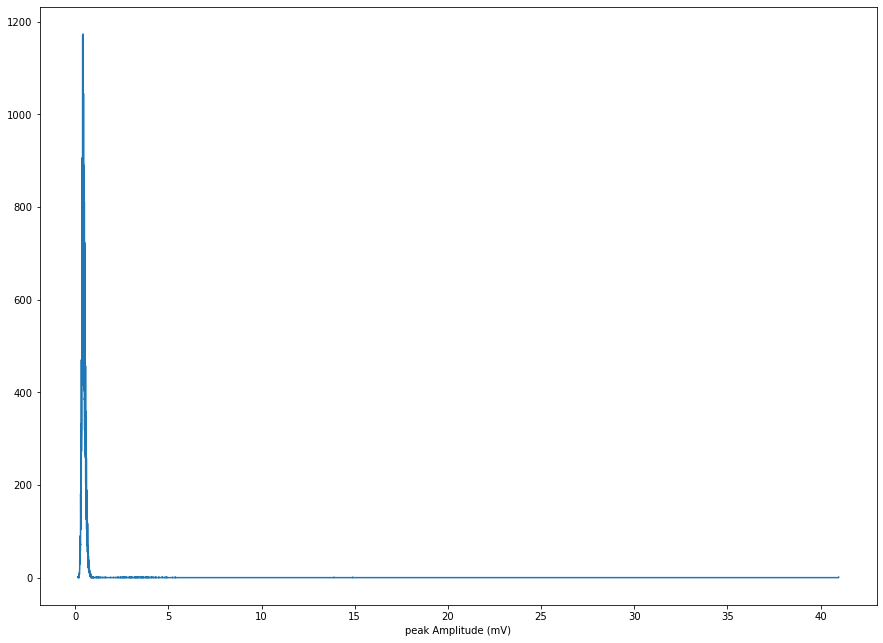

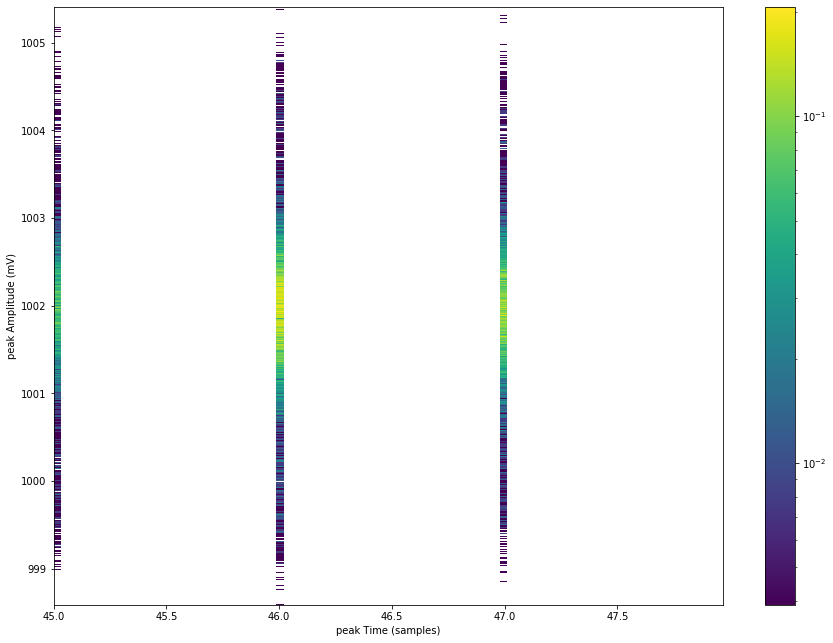

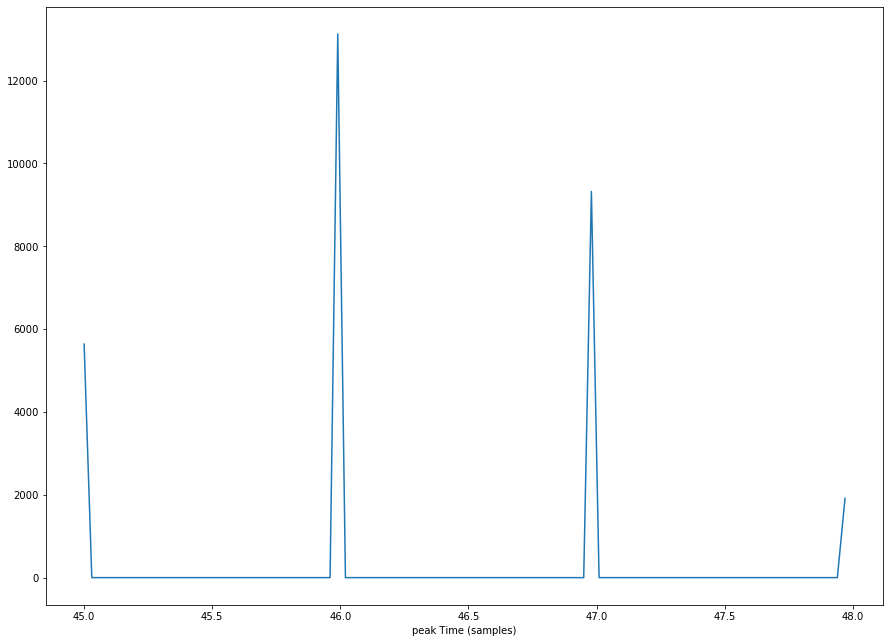

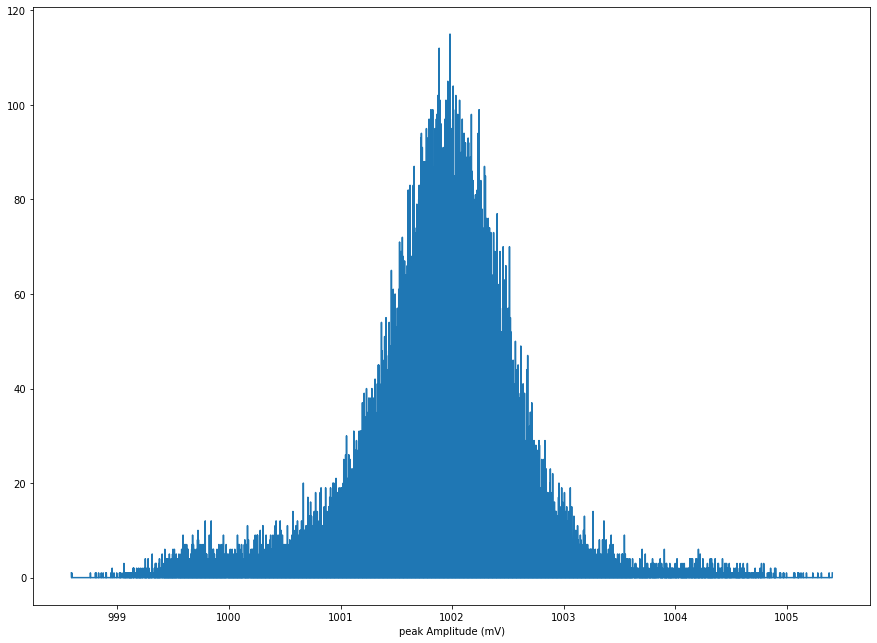

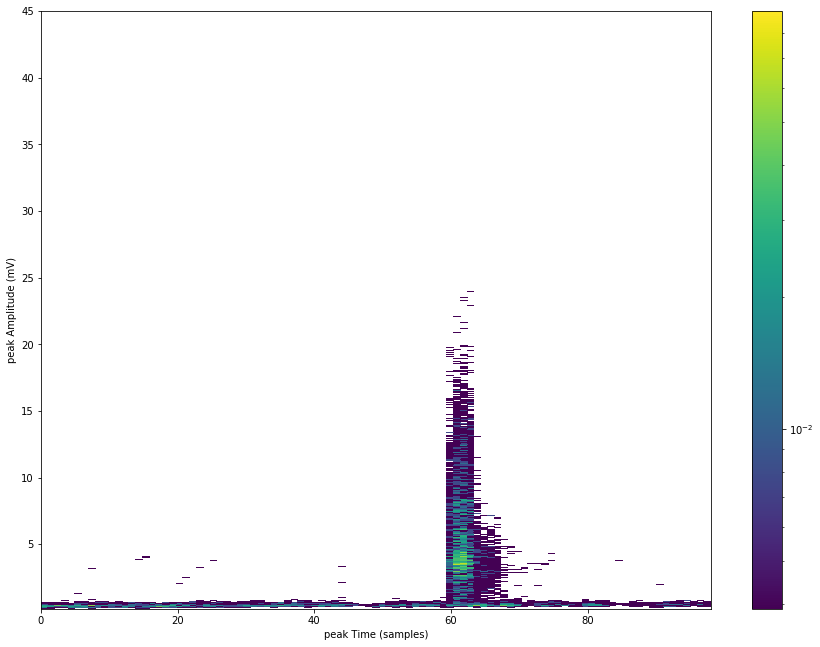

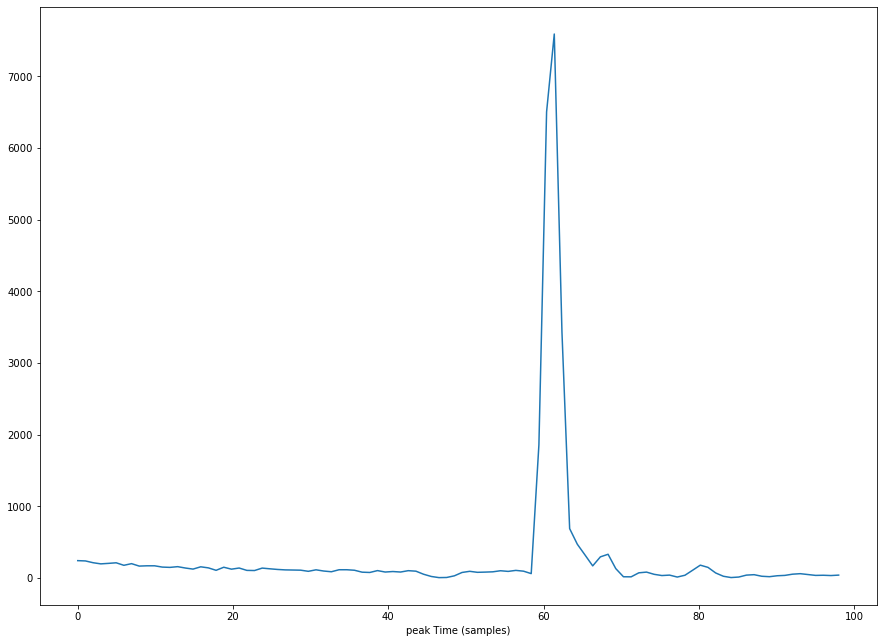

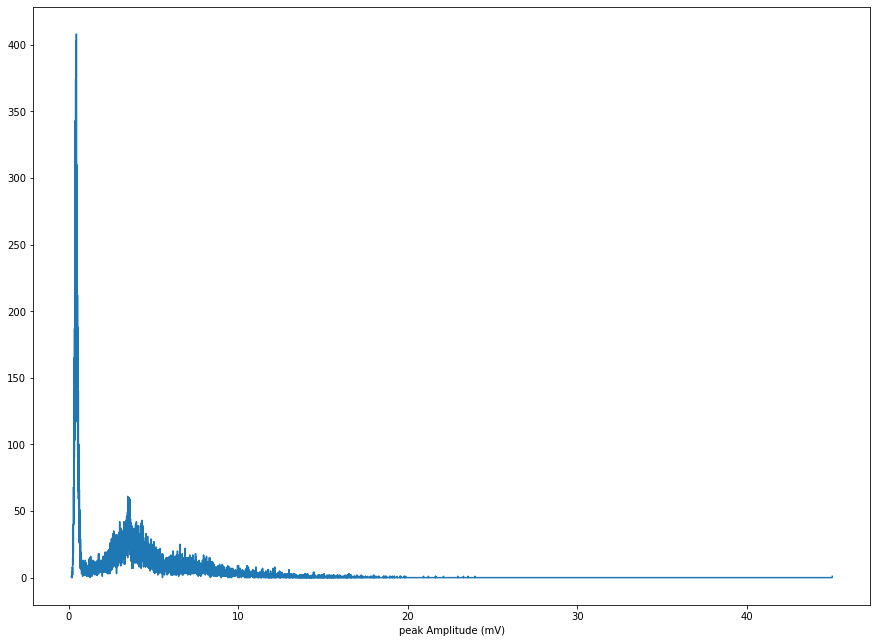

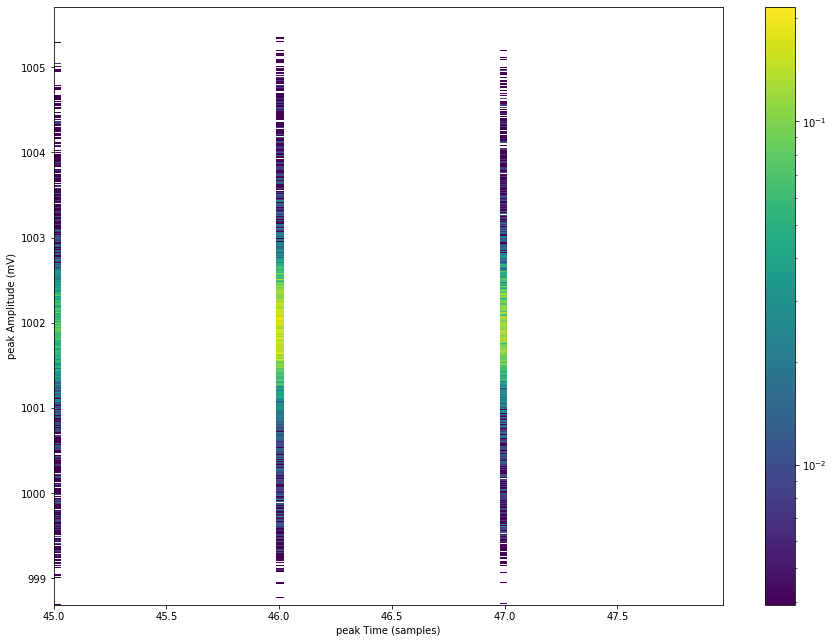

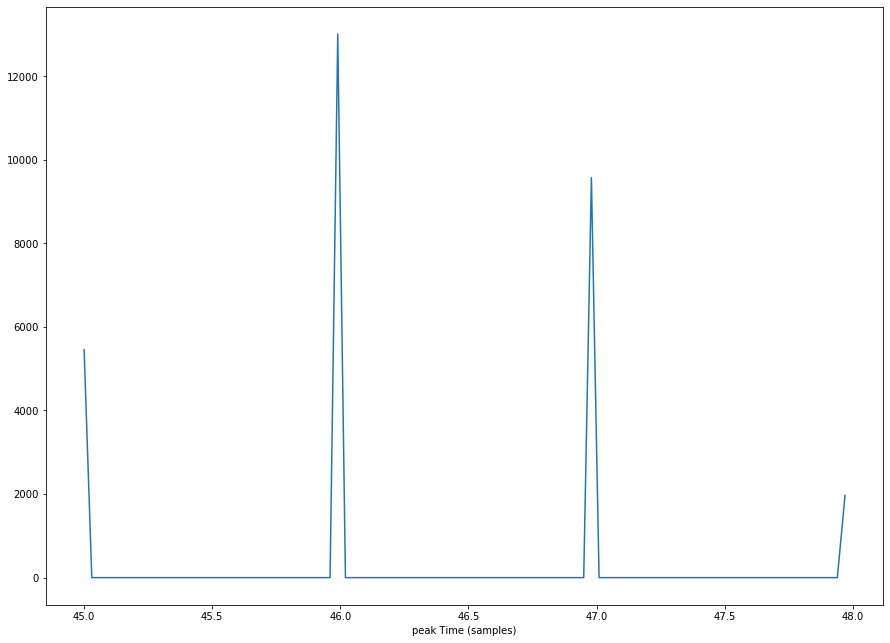

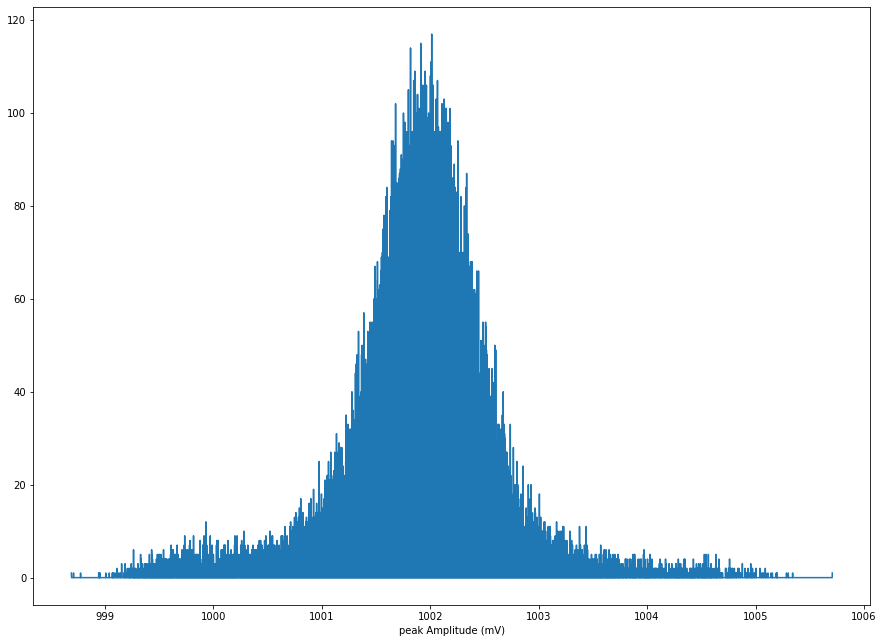

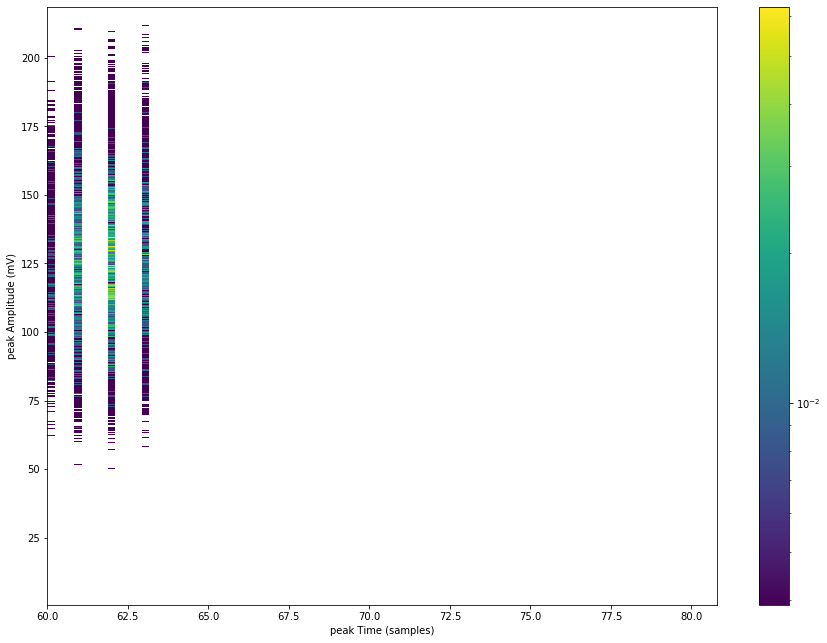

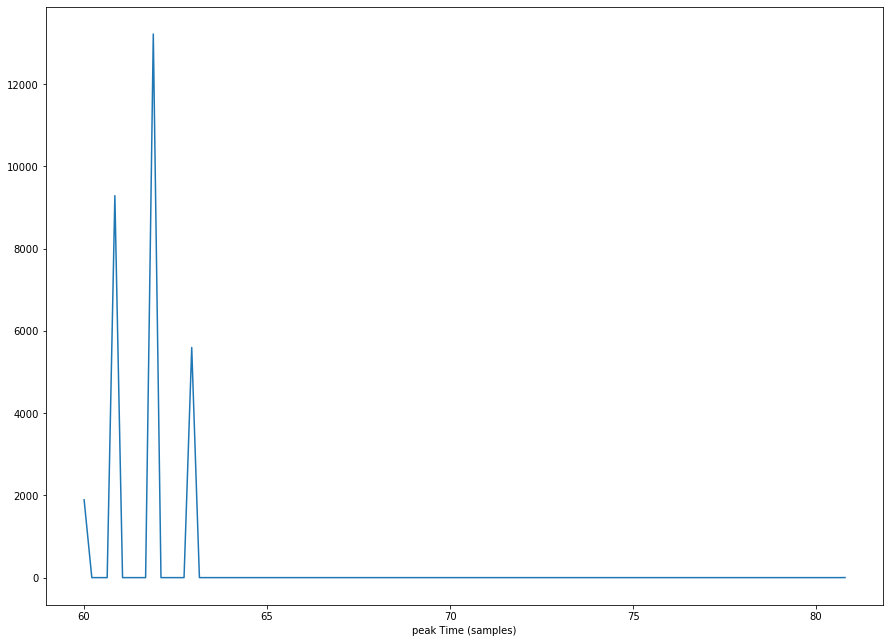

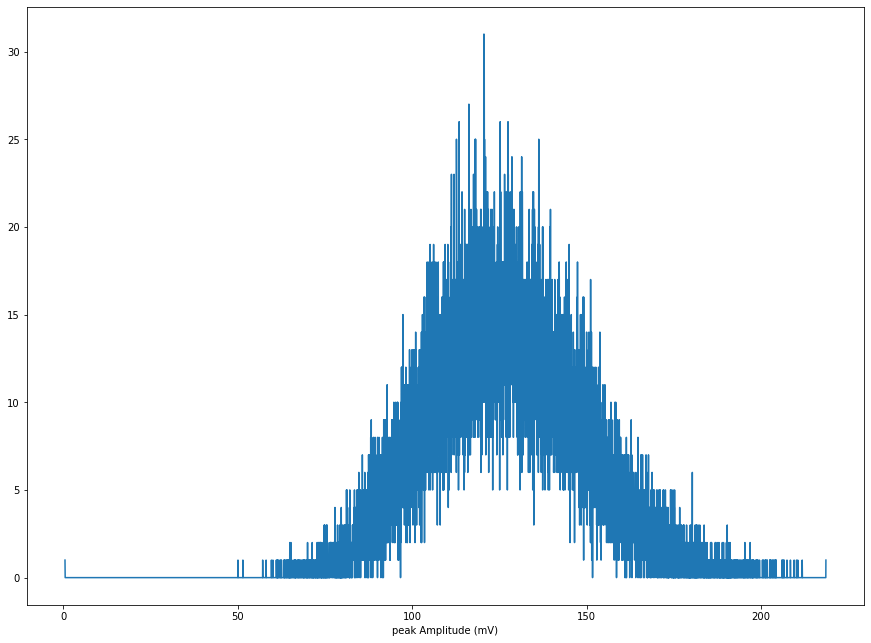

In [3]:
QHists = [tr.extRun(iG,30,5,5,qbins=200,plot=True) for iG in fWaves]
#QHists = [tr.extRun(fWaves[0],30,5,5,qbins=200,plot=True)]

(array([ 4.38692069, -3.55584884, -6.26210944,  8.19271319,  5.30541705,
        8.71899363]), array([[ 0.01787335,  0.14957379,  0.05137627,  0.1176855 , -0.11059673,
        -0.03920402],
       [ 0.14957379,  4.55916379,  1.70747004,  3.33947017, -3.54925989,
        -0.94063531],
       [ 0.05137627,  1.70747004,  0.6435199 ,  1.24810982, -1.33153674,
        -0.35007435],
       [ 0.1176855 ,  3.33947017,  1.24810982,  2.4514921 , -2.59597577,
        -0.69420989],
       [-0.11059673, -3.54925989, -1.33153674, -2.59597577,  2.76608033,
         0.72828858],
       [-0.03920402, -0.94063531, -0.35007435, -0.69420989,  0.72828858,
         0.20023546]]))
(array([-0.51208917, -1.4647485 ,  0.21569317,  0.64832834,  1.58727631,
        3.44207538]), array([[ 4.44341734e-06, -6.32299162e-06, -6.74503848e-06,
         1.70705590e-05, -1.75937806e-06, -1.24158590e-05],
       [-6.32299162e-06,  1.00710994e-03, -5.28282752e-05,
         1.79273683e-03, -3.90042965e-04, -1.11276817e-03],


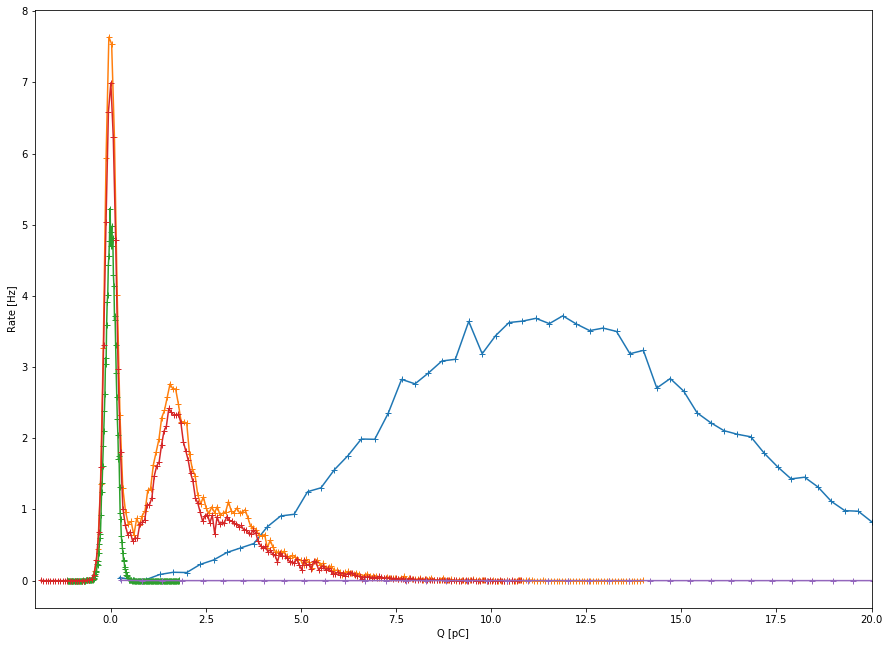

In [4]:
for QSPE in QHists:
    plt.plot(QSPE[1],QSPE[0],marker='+')
    GFit = tr.fitQ(QSPE,[0,12,1,3,1,1])
    #plt.show()
    print(GFit)
#plt.yscale('log')
plt.xlim(-2,20)
plt.xlabel('Q [pC]')
plt.ylabel('Rate [Hz]')
plt.savefig("SPEnew.png")